In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
img = cv.imread("ambe.jpeg",0)
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

In [4]:
def gray_level(image,max_in,min_in):
    img1 = image.copy()
    img1[(image >= min_in) & (image <= max_in)] = 255
    img1[(image < min_in) | (image > max_in)] = 0
    return img1

In [10]:
g = gray_level(img1,200,100)

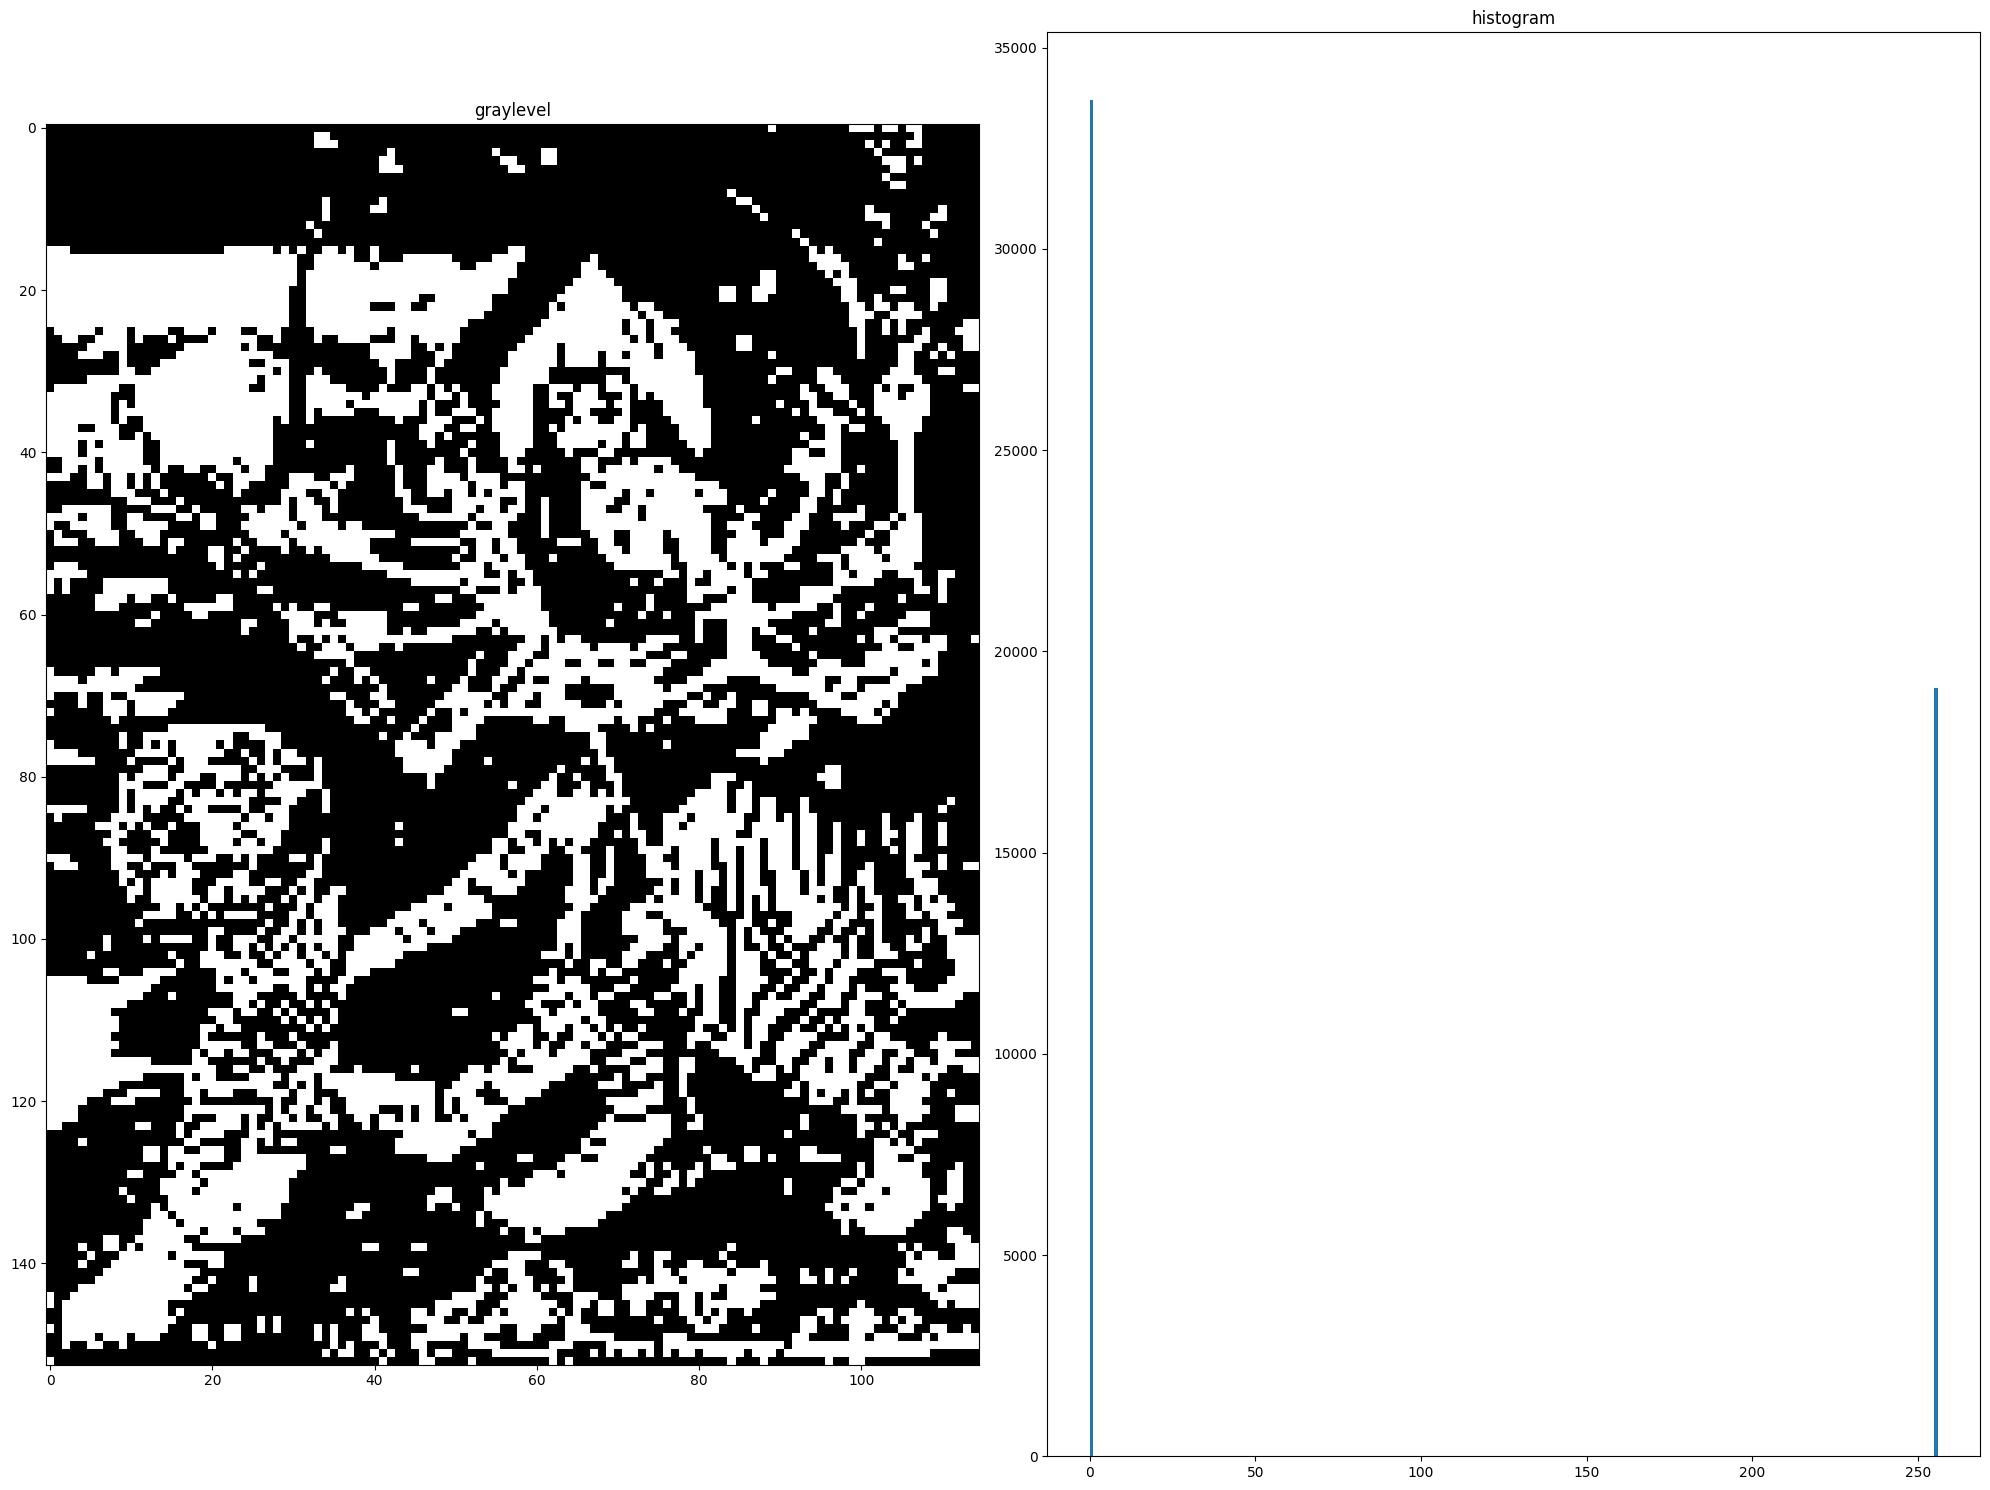

In [11]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1),plt.imshow(g,cmap='gray'),plt.title("graylevel")
plt.subplot(1,2,2),plt.hist(g.flatten(),bins=256,range=[0,256]),plt.title("histogram")
plt.tight_layout()
plt.show()

In [13]:
def box_plot(img):
    x = np.quantile(img,[0.25,0.5,0.75,1])
    img1 = img.copy()
    img1 = cv.resize(img1,(400,400))
    for i in range(200):
        for j in range(200):
            if img1[i,j]<100:
                img1[i,j]=x[0]
    for i in range(200):
        for j in range(200,400):
            if img1[i,j]<100:
                img1[i,j]=x[1]
    for i in range(200,400):
        for j in range(200):
            if img1[i,j]<100:
                img1[i,j]=x[2]
    for i in range(200,400):
        for j in range(200,400):
            if img1[i,j]<100:
                img1[i,j]=x[3]
    return img1

In [14]:
box = box_plot(img)

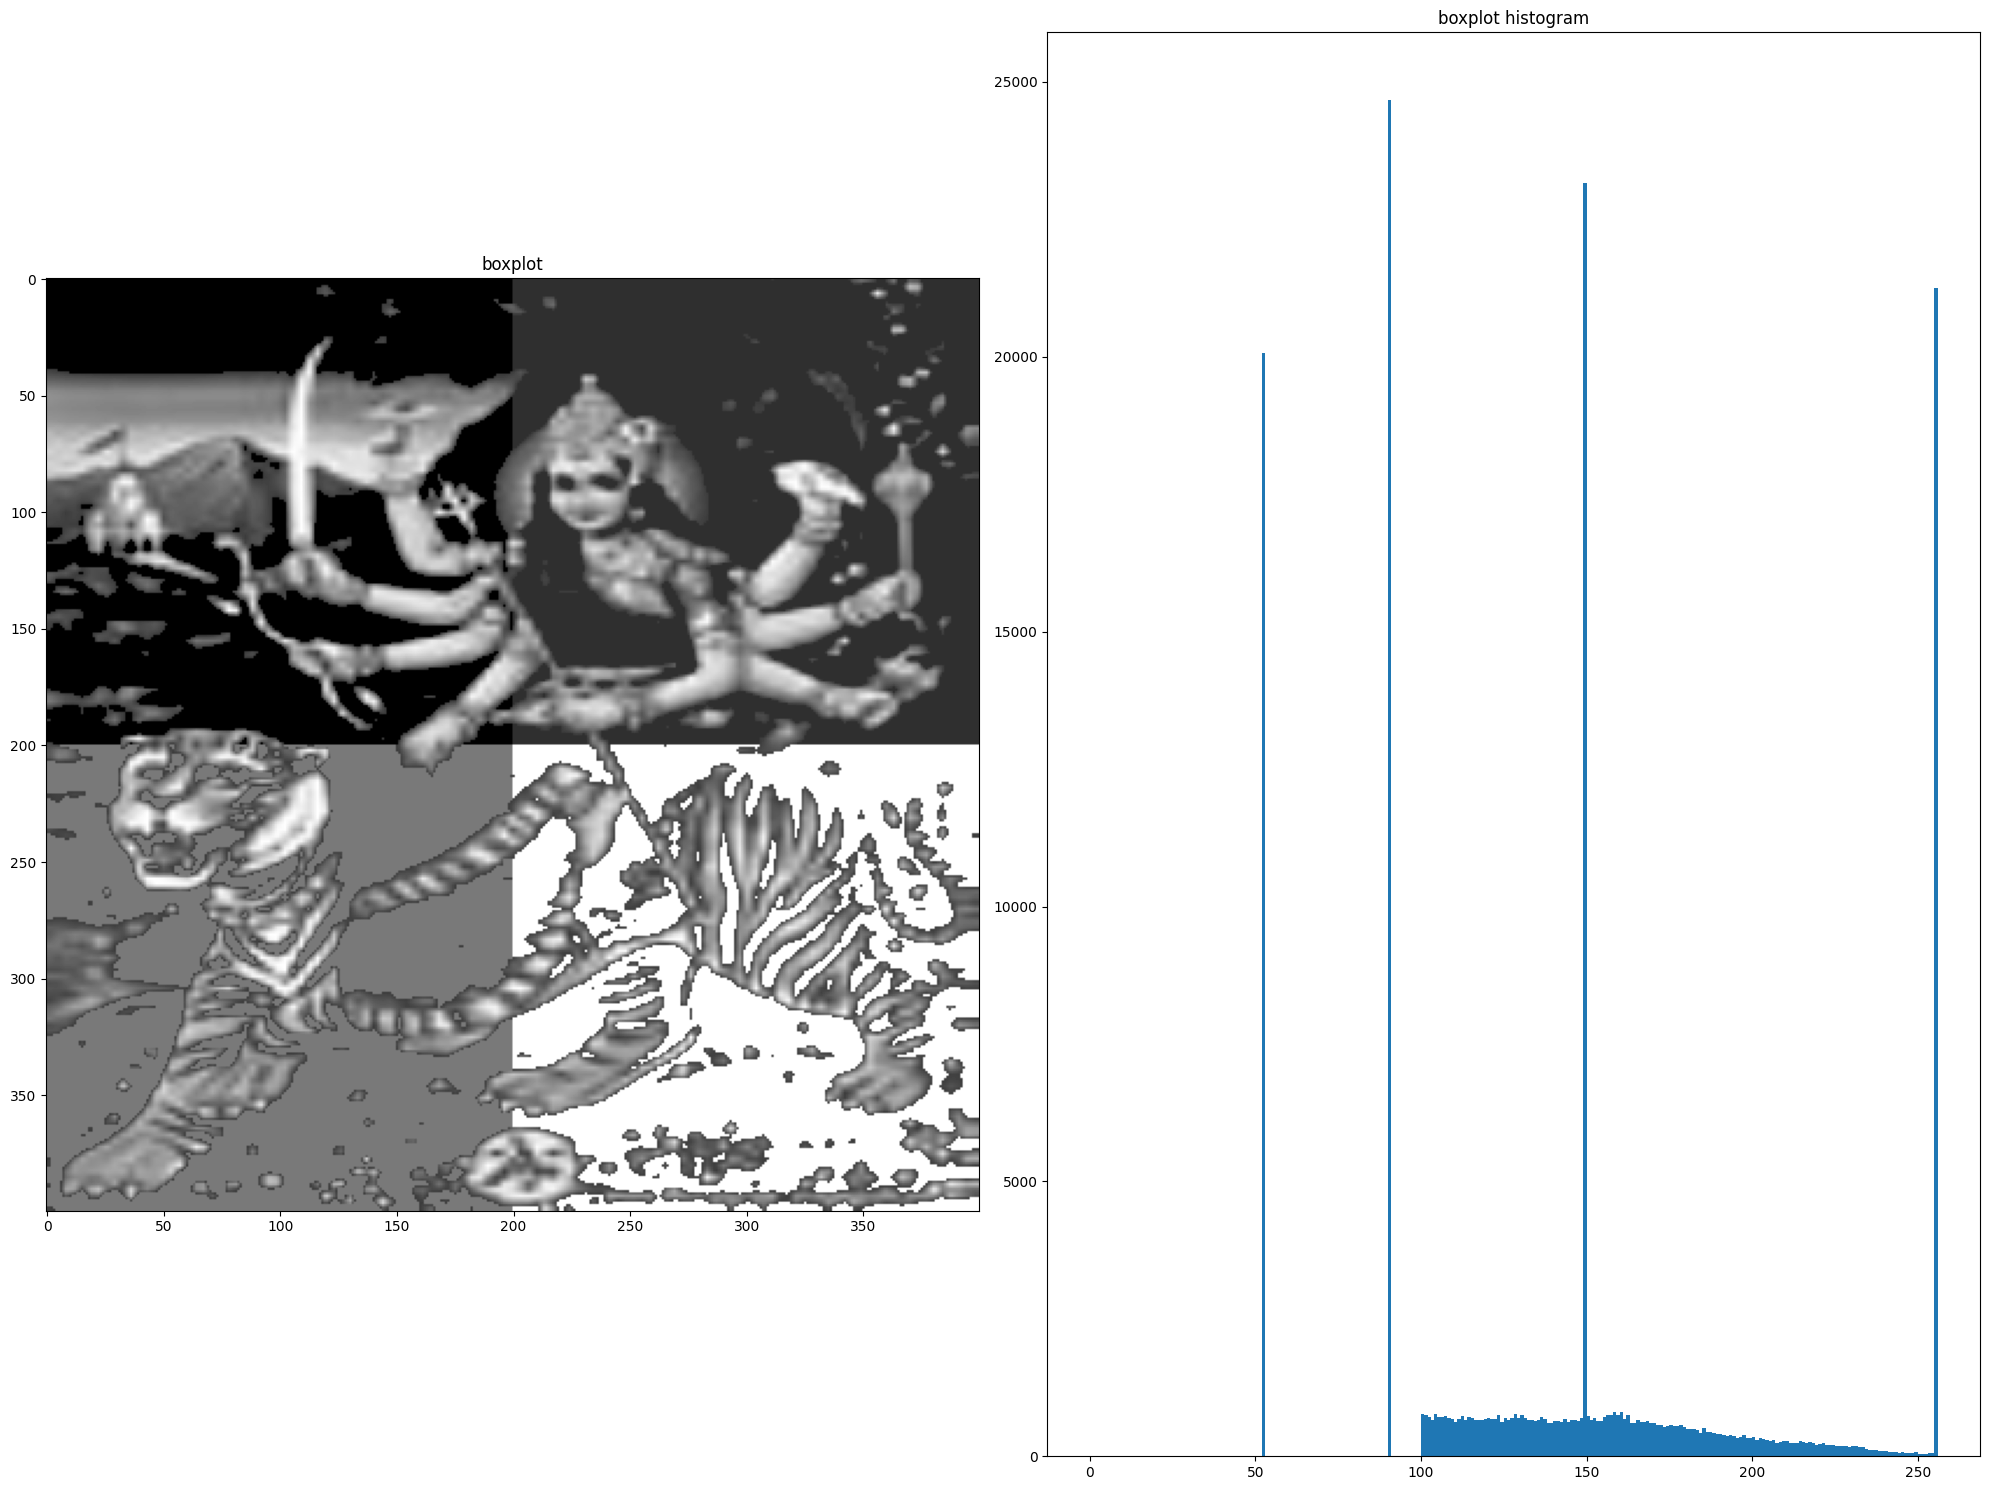

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1),plt.imshow(box,cmap='gray'),plt.title('boxplot')
plt.subplot(1,2,2),plt.hist(box.flatten(),bins=256,range=[0,256]),plt.title('boxplot histogram')
plt.tight_layout()
plt.show()

In [19]:
def histogram_equilizer(img):
    img1=cv.equalizeHist(img)
    return img1

histo=histogram_equilizer(img)

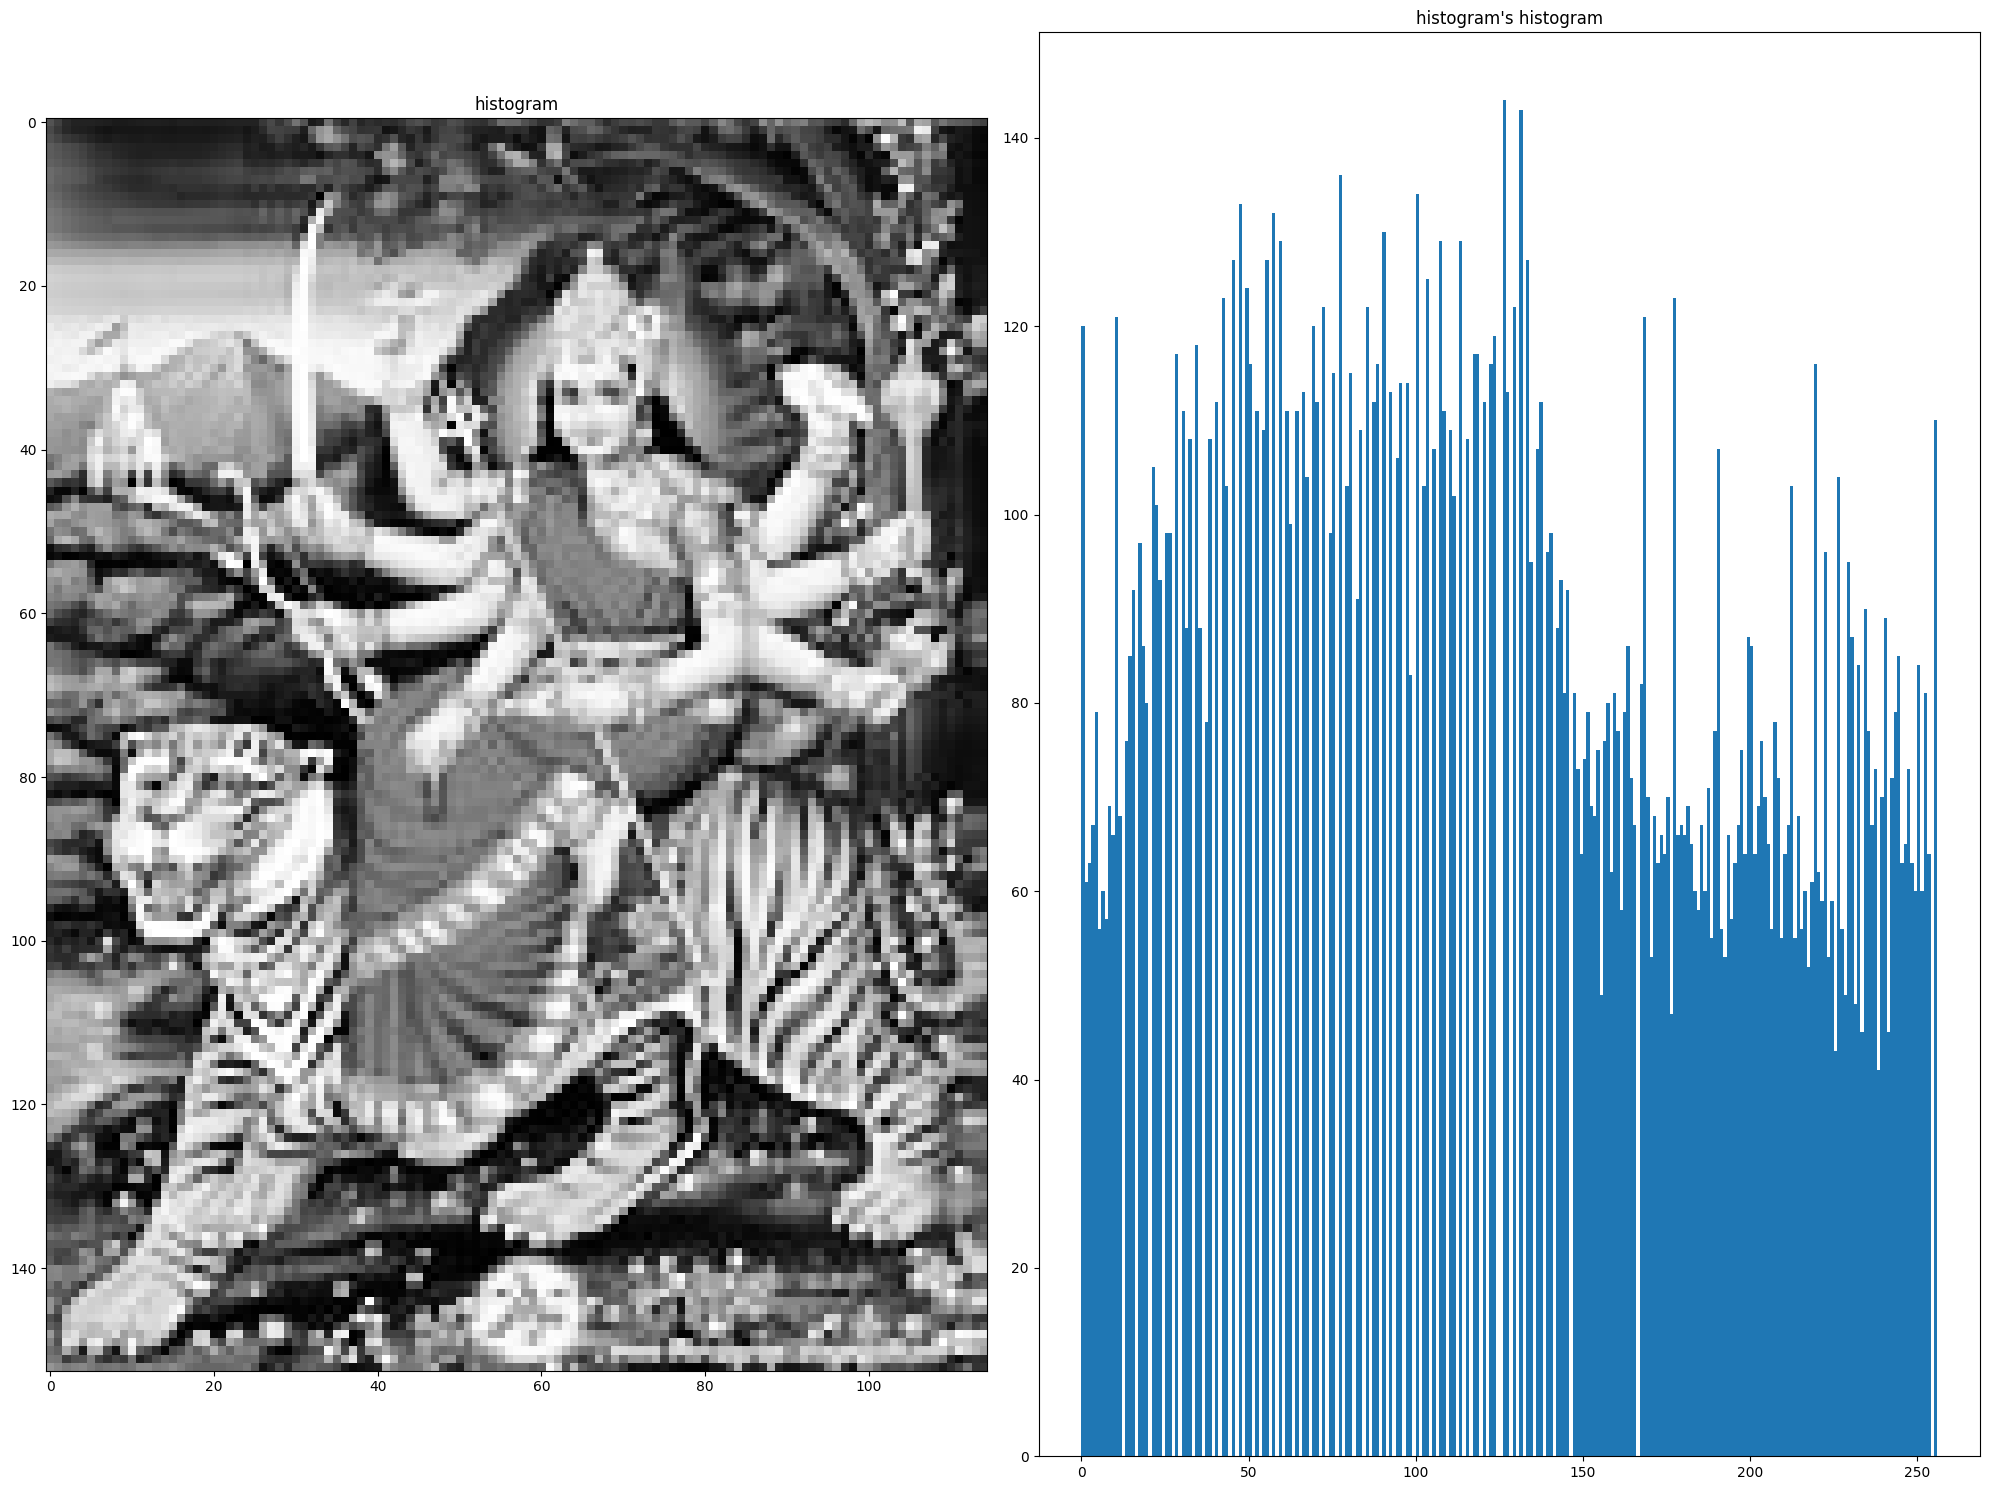

In [21]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1),plt.imshow(histo,cmap='gray'),plt.title("histogram")
plt.subplot(1,2,2),plt.hist(histo.flatten(),bins=256,range=[0,256]),plt.title("histogram's histogram")
plt.tight_layout()
plt.show()

In [29]:
def bit_plane(img):
    list = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            list.append(np.binary_repr(img[i][j],width = 8))
    eight_bit = (np.array([int(i[0]) for i in list],dtype = np.uint8)*128).reshape(img.shape[0],img.shape[1])
    seven_bit = (np.array([int(i[1]) for i in list],dtype = np.uint8)*64).reshape(img.shape[0],img.shape[1])
    six_bit = (np.array([int(i[2]) for i in list],dtype = np.uint8)*32).reshape(img.shape[0],img.shape[1])
    five_bit = (np.array([int(i[3]) for i in list],dtype = np.uint8)*16).reshape(img.shape[0],img.shape[1])
    four_bit = (np.array([int(i[4]) for i in list],dtype = np.uint8)*8).reshape(img.shape[0],img.shape[1])
    three_bit = (np.array([int(i[5]) for i in list],dtype = np.uint8)*4).reshape(img.shape[0],img.shape[1])
    two_bit = (np.array([int(i[6]) for i in list],dtype = np.uint8)*2).reshape(img.shape[0],img.shape[1])
    one_bit = (np.array([int(i[7]) for i in list],dtype = np.uint8)*1).reshape(img.shape[0],img.shape[1])

    finalr = cv.hconcat([eight_bit,seven_bit,six_bit,five_bit])
    finalv = cv.hconcat([four_bit,three_bit,two_bit,one_bit])

    final = cv.vconcat([finalr,finalv])
    return final

In [30]:
bit = bit_plane(img)

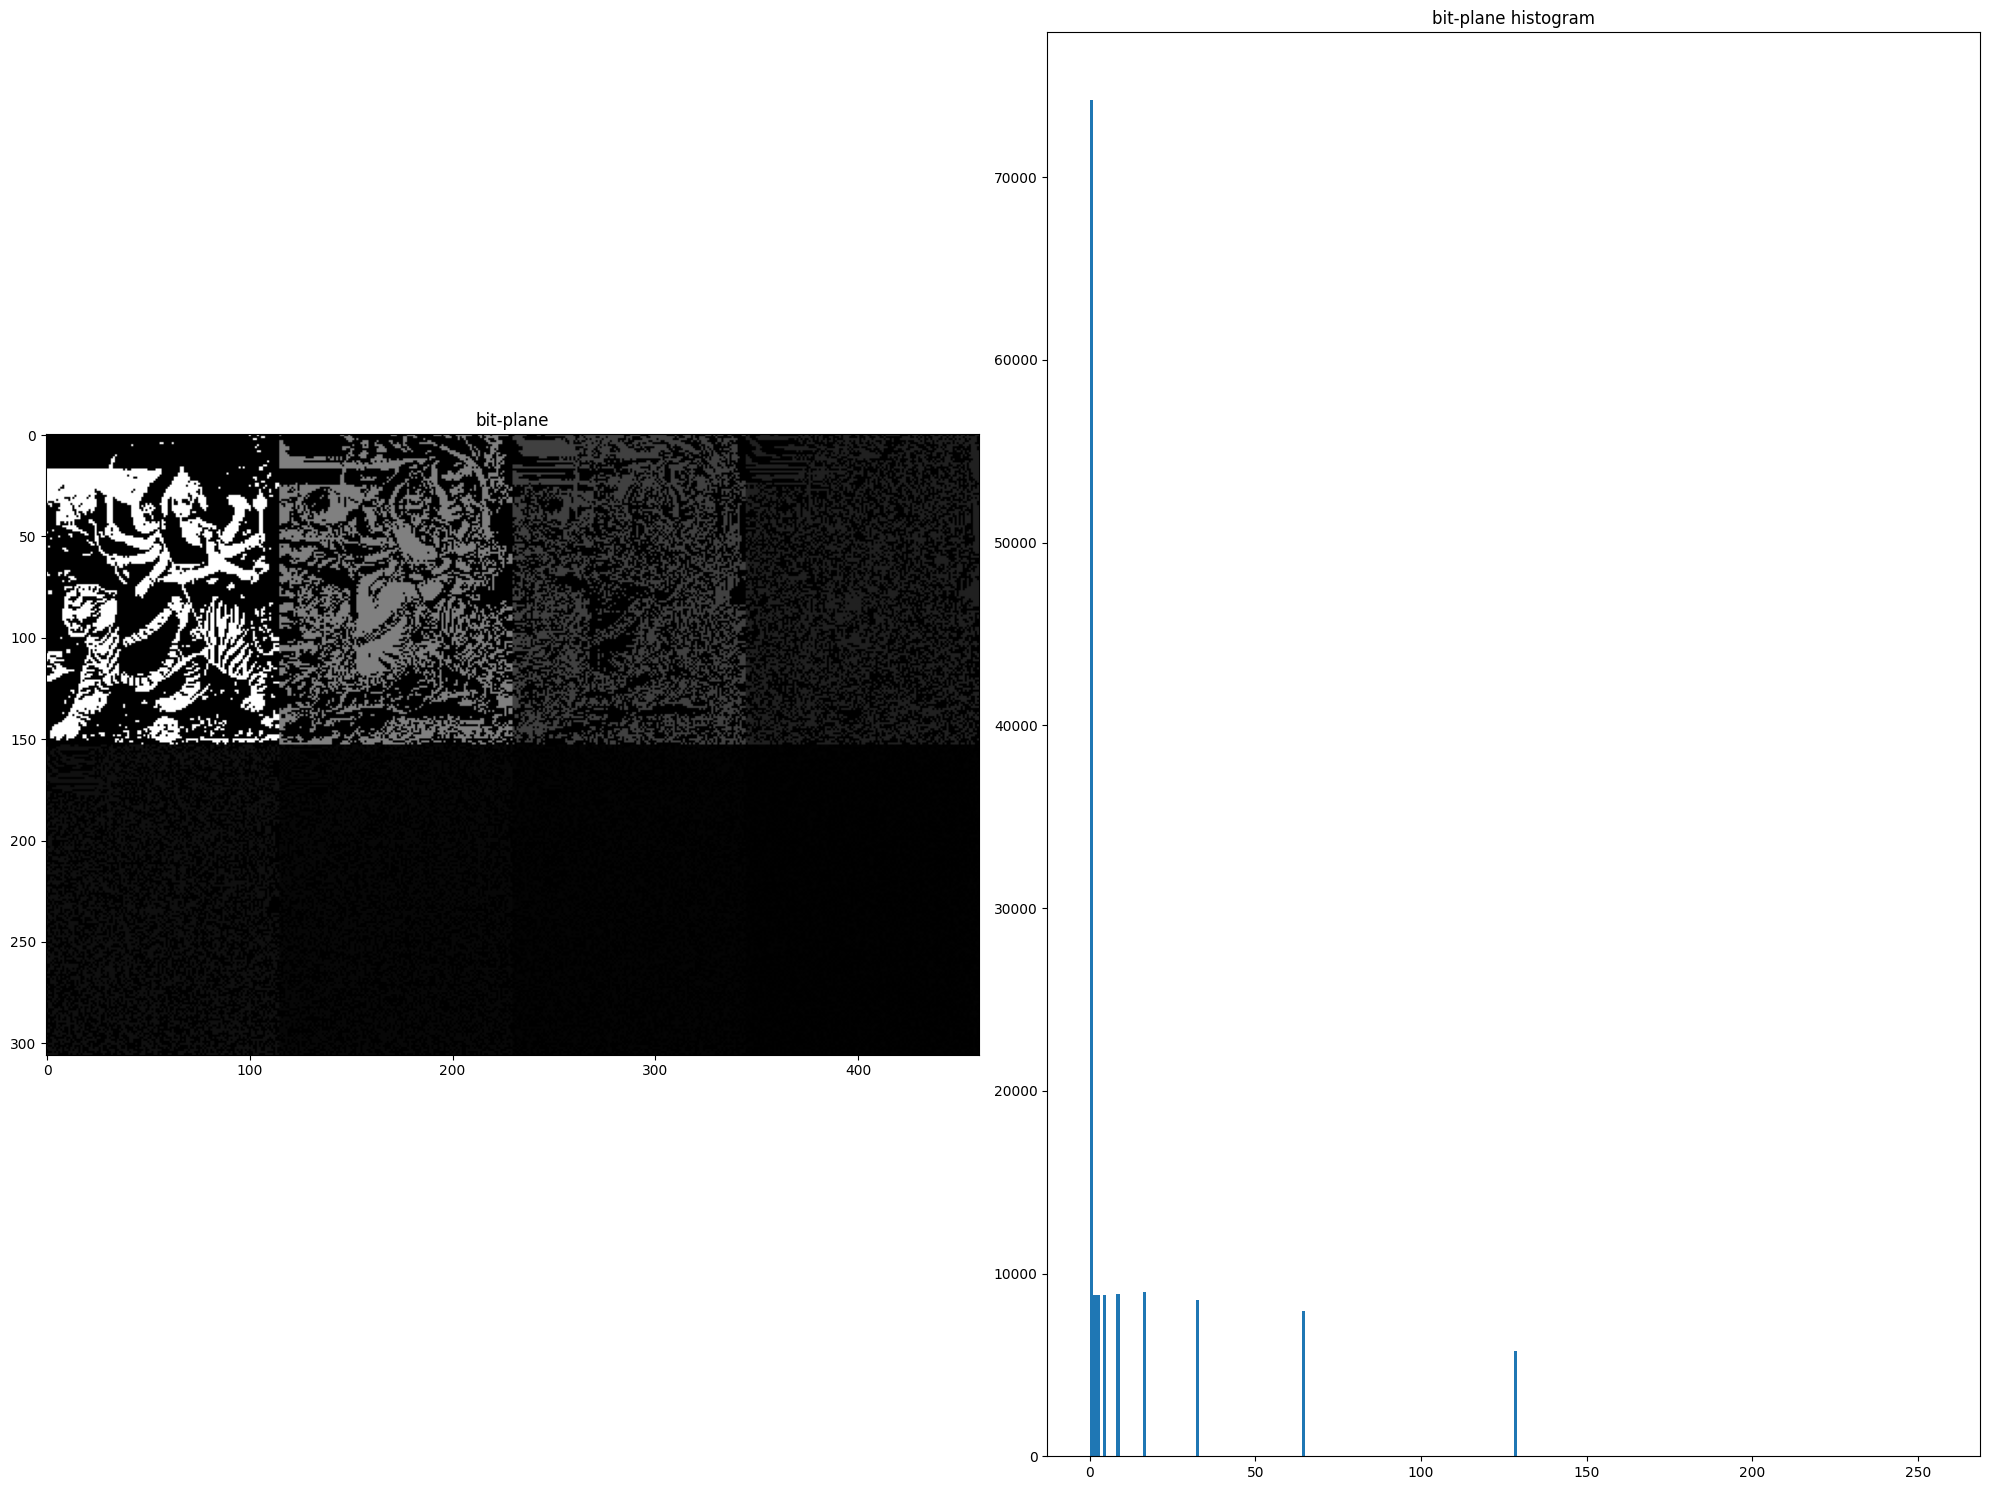

In [31]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1),plt.imshow(bit,cmap='gray'),plt.title("bit-plane")
plt.subplot(1,2,2),plt.hist(bit.flatten(),bins=256,range=[0,256]),plt.title("bit-plane histogram")
plt.tight_layout()
plt.show()

In [35]:
def bit_plane1(img):
    lst = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
             lst.append(np.binary_repr(img[i][j] ,width=8))

    
    eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
    seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
    six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
    five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
    four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
    three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
    two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
    one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

    finalr = cv.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
    finalv =cv.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

    final = cv.vconcat([finalr,finalv])
    return final


In [36]:
bit1 = bit_plane1(img)

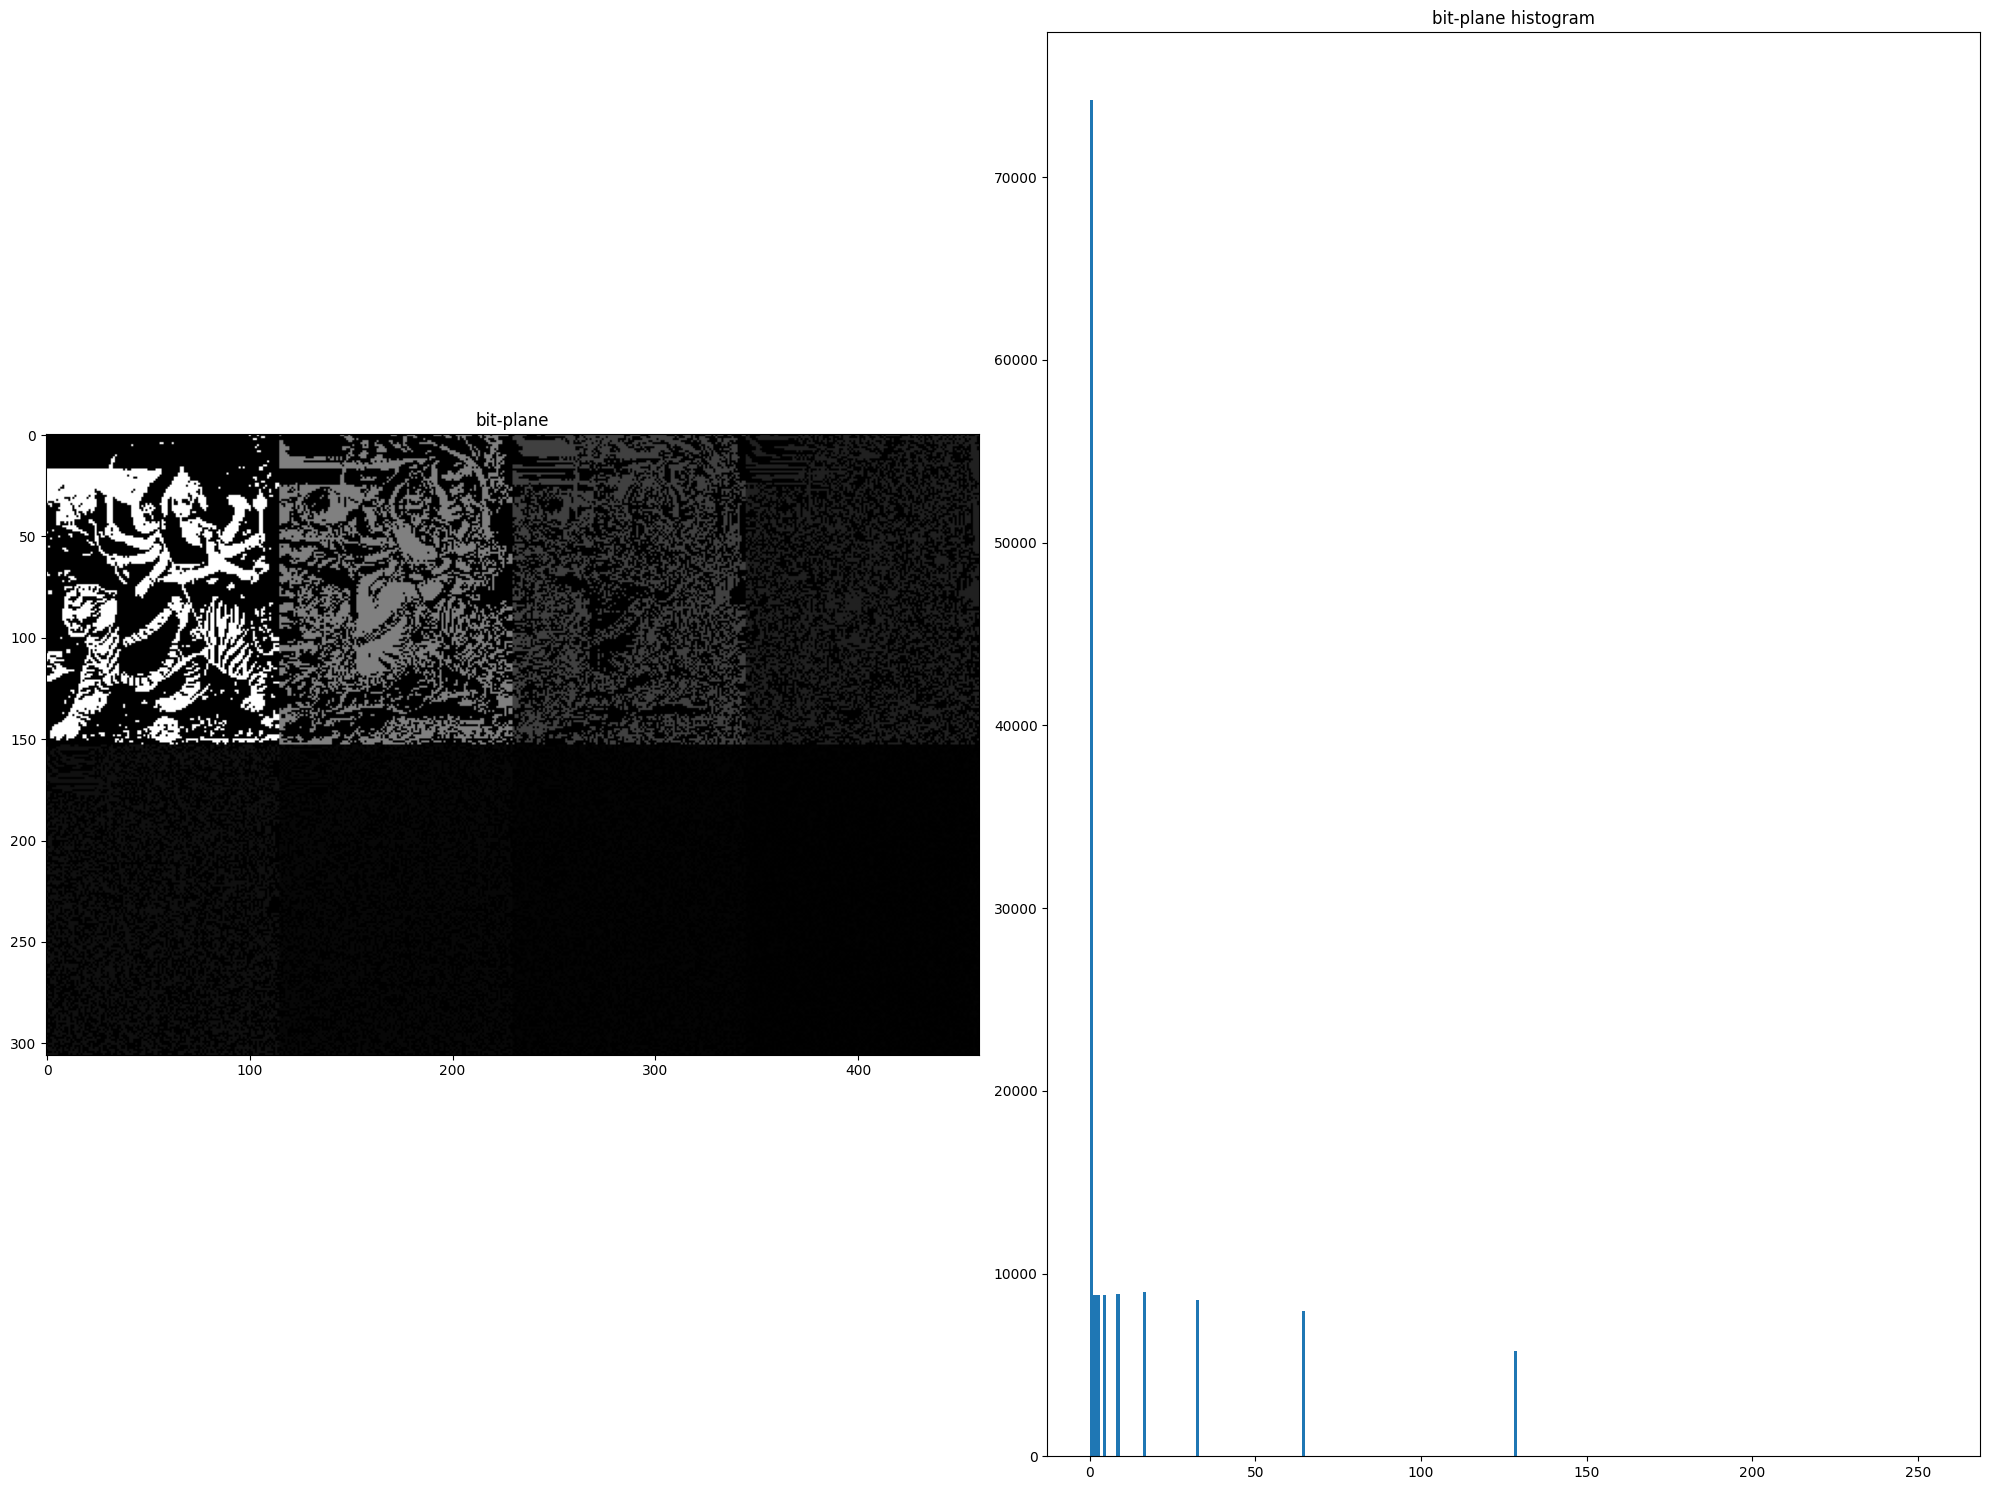

In [37]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1),plt.imshow(bit1,cmap='gray'),plt.title("bit-plane")
plt.subplot(1,2,2),plt.hist(bit1.flatten(),bins=256,range=[0,256]),plt.title("bit-plane histogram")
plt.tight_layout()
plt.show()